In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("C:/Users/Lenovo/Documents/Untitled Folder/images.jpg")

In [3]:
img.shape

(168, 300, 3)

In [4]:
img


array([[[56, 73, 76],
        [56, 73, 76],
        [55, 72, 75],
        ...,
        [53, 70, 73],
        [53, 70, 73],
        [53, 70, 73]],

       [[56, 73, 76],
        [56, 73, 76],
        [55, 72, 75],
        ...,
        [54, 71, 74],
        [54, 71, 74],
        [54, 71, 74]],

       [[56, 73, 76],
        [56, 73, 76],
        [55, 72, 75],
        ...,
        [54, 71, 74],
        [54, 71, 74],
        [54, 71, 74]],

       ...,

       [[19, 17, 16],
        [20, 18, 17],
        [20, 18, 17],
        ...,
        [21, 19, 19],
        [21, 19, 19],
        [21, 19, 19]],

       [[20, 18, 17],
        [20, 18, 17],
        [21, 19, 18],
        ...,
        [22, 20, 20],
        [21, 19, 19],
        [21, 19, 19]],

       [[20, 18, 17],
        [20, 18, 17],
        [21, 19, 18],
        ...,
        [22, 20, 20],
        [22, 20, 20],
        [21, 19, 19]]], dtype=uint8)

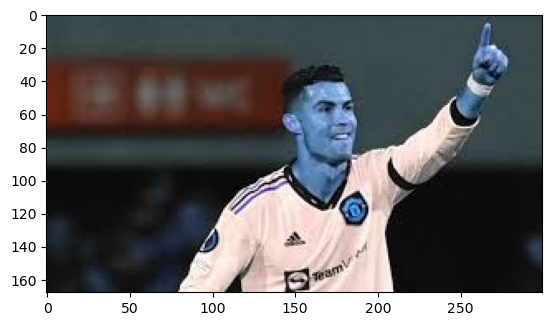

In [5]:
plt.imshow(img)

In [6]:
while True:
    cv2.imshow('Result',img)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

In [7]:
haar_data = cv2.CascadeClassifier('data.xml')

In [8]:
haar_data.detectMultiScale(img)

array([[153,  39,  44,  44]])

In [9]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w , y+h),(255,0,255), 4)
    cv2.imshow('Result',img)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

In [12]:
capture = cv2.VideoCapture(0)
data =[]
while True:
    flag,img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), ((x+w), (y+h)), (255,0,255), 4)
            face = img[y:y+h,x:x+w, :]
            face = cv2.resize(face,(50,50))
            print(len(data))
            if len(data) < 200:
                data.append(face)
        cv2.imshow('Result',img)
        if cv2.waitKey(0) == 27 or len(data) >= 200:
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [11]:
np.save('without_mask.npy',data)

In [13]:
np.save('with_mask.npy',data)

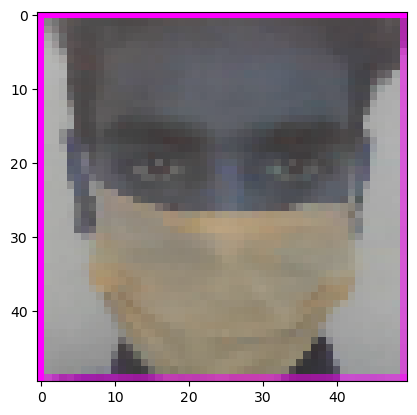

In [15]:
plt.imshow(data[10])

In [ ]:
np